# Background
1분봉 최대거래대금 60억원 이상 종목을 매매하면 수익확률이 높다.  
그렇다면 최대거래대금이 터지고 몇 분 뒤 매매할 때 수익확률이 높을까?  
유튜브: https://youtu.be/K05R7MiM5H8

# Import

In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Load

In [60]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,체결시간,종목명,매수가,수익률,매매기법,매도시간,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사,10이격도,20이격도,최대거래대금(억),최소거래대금(억),최대거래대금 시간
0,2022-03-29,09:09:07,고려시멘트,5230,2.87,NaN,09:21:27,198440,16.22,24.44,6.22,1,4.38,9.72,113,25,2022-04-20 09:06:00
1,2022-03-29,09:28:09,고려시멘트,5410,1.85,NaN,09:32:19,198440,20.22,24.44,6.22,1,0.93,1.72,113,16,2022-04-20 09:06:00
2,2022-03-29,10:38:18,고려시멘트,5441,0.15,NaN,10:51:17,198440,20.91,24.44,6.22,1,0.35,0.09,113,2,2022-04-20 09:06:00
3,2022-03-29,09:51:11,영진약품,5490,0.66,NaN,09:55:24,3520,6.60,10.10,0.19,1,1.57,1.94,62,0,2022-04-20 09:50:00
4,2022-03-29,09:58:16,버킷스튜디오,5060,-0.59,NaN,09:59:56,66410,11.58,18.85,3.09,1,0.87,2.06,72,3,2022-04-20 09:22:00


# Preprocessing

In [61]:
df = df[df['최대거래대금(억)'] > 60]

In [62]:
df['체결시간'] = pd.to_datetime(df['체결시간']).apply(lambda x : x.replace(second=00))
df['최대거래대금 시간'] = pd.to_datetime(df['최대거래대금 시간']).apply(lambda x : x.replace(second=00))

In [63]:
df['시차'] =  df['체결시간'] - df['최대거래대금 시간']

In [64]:
df['시차'] = df['시차'].apply(lambda x : x.total_seconds() / 60)

In [65]:
df.head()

,주문일자,체결시간,종목명,매수가,수익률,매매기법,매도시간,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사,10이격도,20이격도,최대거래대금(억),최소거래대금(억),최대거래대금 시간,시차
0,2022-03-29,2022-04-20 09:09:00,고려시멘트,5230,2.87,NaN,09:21:27,198440,16.22,24.44,6.22,1,4.38,9.72,113,25,2022-04-20 09:06:00,3.0
1,2022-03-29,2022-04-20 09:28:00,고려시멘트,5410,1.85,NaN,09:32:19,198440,20.22,24.44,6.22,1,0.93,1.72,113,16,2022-04-20 09:06:00,22.0
2,2022-03-29,2022-04-20 10:38:00,고려시멘트,5441,0.15,NaN,10:51:17,198440,20.91,24.44,6.22,1,0.35,0.09,113,2,2022-04-20 09:06:00,92.0
3,2022-03-29,2022-04-20 09:51:00,영진약품,5490,0.66,NaN,09:55:24,3520,6.60,10.10,0.19,1,1.57,1.94,62,0,2022-04-20 09:50:00,1.0
4,2022-03-29,2022-04-20 09:58:00,버킷스튜디오,5060,-0.59,NaN,09:59:56,66410,11.58,18.85,3.09,1,0.87,2.06,72,3,2022-04-20 09:22:00,36.0


# Visualization
보통 1시간 이내 매수하게 된다.

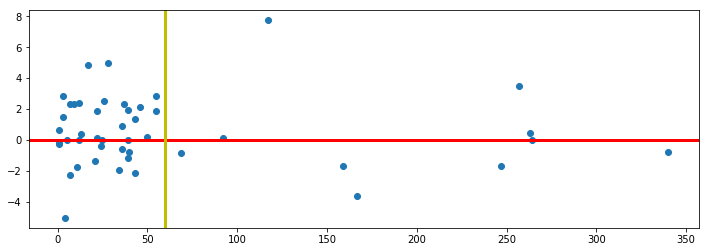

In [67]:
plt.scatter(df['시차'], df['수익률'])
plt.axhline(y=0, color='r', linewidth=3)
plt.axvline(x=60, color='y', linewidth=3)
plt.rcParams["figure.figsize"] = (12, 4)
plt.show()

# Conclusion
1분봉 거래대금이 60억원 이상 터졌다면 1시간 이내 매매할 가능성이 높으므로 의식적으로 염두에 두고 유심히 지켜본다.